In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]
import seaborn as sns
from itertools import cycle

from analysis_utils.ClassifierPlots import create_reliability_diagram, create_roc_curve, create_feature_importance_plot
from analysis_utils.Analysis import print_accuracy_and_classification_report, predict_classes, get_somatic_error_type

sns.set_style("white")
sns.set_context('poster')

In [3]:
# Pull in training data
training_data = pd.read_pickle('/home/anepal/data/training_data_preprocessed.pkl')
training_data.sort_index(axis=1, inplace=True)

In [4]:
training_data

,call,disease_AML,disease_GST,disease_MPNST,disease_SCLC,disease_breast,disease_colorectal,disease_glioblastoma,disease_lymphoma,disease_melanoma,...,tumor_var_avg_distance_to_q2_start_in_q2_reads,tumor_var_avg_mapping_quality,tumor_var_avg_num_mismaches_as_fraction,tumor_var_avg_pos_as_fraction,tumor_var_avg_se_mapping_quality,tumor_var_avg_sum_mismatch_qualities,tumor_var_count,tumor_var_num_minus_strand,tumor_var_num_plus_strand,tumor_var_num_q2_containing_reads
fSsFJH1EY3AKAWF2 BER9Q2JBY3EPAWUcZUpOaAZCc0MRSRU=,a,1,0,0,0,0,0,0,0,0,...,0.377551,0.192667,0.057692,0.62,0.140667,0.215676,0.000990,0.001075,0.000806,0.000735
fSsFJH1EY3AKAWF2 BEV9RGJDY3UABGEcYkpMaAJNdkcXSQY=,s,1,0,0,0,0,0,0,0,0,...,0.479592,1.000000,0.019231,0.51,0.614833,0.074597,0.007054,0.006450,0.007258,0.006860
fSsFJH1EY3AKAWF2 BEV9RGJDZ3oMAWMcYkpMbA1Bc0UTSQY=,s,1,0,0,0,0,0,0,0,0,...,0.408163,1.000000,0.019231,0.53,0.616667,0.078946,0.003898,0.004192,0.003226,0.003553
fSsFJH1EY3AKAWF2 BEV9QmFCZXsLA2IcZElNbgxGcUN9SQY=,a,1,0,0,0,0,0,0,0,0,...,0.479592,0.483333,0.346154,0.96,0.483333,0.661405,0.000124,0.000000,0.000269,0.000245
fSsFJH1EY3AKAWF2 BEZ9RmNHanUOA2YBfElLaQ1DcEFnRwZ8eg==,a,1,0,0,0,0,0,0,0,0,...,0.122449,0.270000,0.096154,0.28,0.200000,0.302414,0.001547,0.001397,0.001613,0.001593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fSsJJ31OYnIJBWE= bU5zQ2lFYHQODHwFZUFKawNDfjBuIw==,s,0,0,0,1,0,0,0,0,0,...,0.551020,0.987000,0.019231,0.58,0.613333,0.080375,0.002475,0.000537,0.004704,0.004288
fSsJJ31OYnIJBWE= bU5yRGREYHcBAHwEYkxLawBMciNuNA==,s,0,0,0,1,0,0,0,0,0,...,0.408163,0.974500,0.019231,0.55,0.612000,0.079771,0.004455,0.004085,0.004570,0.004533
fSsJJ31OYnIJBWE= bU5yQmFGZHcKDHwEZElJbwBHfiNuNg==,s,0,0,0,1,0,0,0,0,0,...,0.387755,0.984500,0.038462,0.55,0.614333,0.099140,0.003589,0.003977,0.002823,0.003308
fSsJJ31OYnIJBWE= bU5xTmVHY3cMDXwHaE1IaABBfzBuNg==,s,0,0,0,1,0,0,0,0,0,...,0.418367,0.979000,0.019231,0.51,0.614500,0.079308,0.003775,0.003440,0.003898,0.004043


In [5]:
# Remove AML31 case
aml31_training = training_data[training_data.index.str.contains('fSsMNn1DZ3AIDGk=')]
training_data = training_data[~training_data.index.str.contains('fSsMNn1DZ3AIDGk=')]

In [6]:
training_data

,call,disease_AML,disease_GST,disease_MPNST,disease_SCLC,disease_breast,disease_colorectal,disease_glioblastoma,disease_lymphoma,disease_melanoma,...,tumor_var_avg_distance_to_q2_start_in_q2_reads,tumor_var_avg_mapping_quality,tumor_var_avg_num_mismaches_as_fraction,tumor_var_avg_pos_as_fraction,tumor_var_avg_se_mapping_quality,tumor_var_avg_sum_mismatch_qualities,tumor_var_count,tumor_var_num_minus_strand,tumor_var_num_plus_strand,tumor_var_num_q2_containing_reads
fSsFJH1EY3AKAWF2 BER9Q2JBY3EPAWUcZUpOaAZCc0MRSRU=,a,1,0,0,0,0,0,0,0,0,...,0.377551,0.192667,0.057692,0.62,0.140667,0.215676,0.000990,0.001075,0.000806,0.000735
fSsFJH1EY3AKAWF2 BEV9RGJDY3UABGEcYkpMaAJNdkcXSQY=,s,1,0,0,0,0,0,0,0,0,...,0.479592,1.000000,0.019231,0.51,0.614833,0.074597,0.007054,0.006450,0.007258,0.006860
fSsFJH1EY3AKAWF2 BEV9RGJDZ3oMAWMcYkpMbA1Bc0UTSQY=,s,1,0,0,0,0,0,0,0,0,...,0.408163,1.000000,0.019231,0.53,0.616667,0.078946,0.003898,0.004192,0.003226,0.003553
fSsFJH1EY3AKAWF2 BEV9QmFCZXsLA2IcZElNbgxGcUN9SQY=,a,1,0,0,0,0,0,0,0,0,...,0.479592,0.483333,0.346154,0.96,0.483333,0.661405,0.000124,0.000000,0.000269,0.000245
fSsFJH1EY3AKAWF2 BEZ9RmNHanUOA2YBfElLaQ1DcEFnRwZ8eg==,a,1,0,0,0,0,0,0,0,0,...,0.122449,0.270000,0.096154,0.28,0.200000,0.302414,0.001547,0.001397,0.001613,0.001593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fSsJJ31OYnIJBWE= bU5zQ2lFYHQODHwFZUFKawNDfjBuIw==,s,0,0,0,1,0,0,0,0,0,...,0.551020,0.987000,0.019231,0.58,0.613333,0.080375,0.002475,0.000537,0.004704,0.004288
fSsJJ31OYnIJBWE= bU5yRGREYHcBAHwEYkxLawBMciNuNA==,s,0,0,0,1,0,0,0,0,0,...,0.408163,0.974500,0.019231,0.55,0.612000,0.079771,0.004455,0.004085,0.004570,0.004533
fSsJJ31OYnIJBWE= bU5yQmFGZHcKDHwEZElJbwBHfiNuNg==,s,0,0,0,1,0,0,0,0,0,...,0.387755,0.984500,0.038462,0.55,0.614333,0.099140,0.003589,0.003977,0.002823,0.003308
fSsJJ31OYnIJBWE= bU5xTmVHY3cMDXwHaE1IaABBfzBuNg==,s,0,0,0,1,0,0,0,0,0,...,0.418367,0.979000,0.019231,0.51,0.614500,0.079308,0.003775,0.003440,0.003898,0.004043


In [7]:
# Show the calls associate with training data
training_data.groupby('call').size()

call
a    10643
f     8854
g     3122
s    18381
dtype: int64

In [8]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

# Somatic, ambigous, fail classifier

In [9]:
# Re-label the germline calls as failed calls
three_class = training_data.replace('g','f')
three_class.sort_index(axis=1, inplace=True)

In [10]:
# Show the calls associate with training data
three_class.groupby('call').size()

call
a    10643
f    11976
s    18381
dtype: int64

In [11]:
# Get labels for training data
Y = three_class.call.values
# Get training data as numpy array
X = training_data.drop(['call'], axis=1).astype(float).values

In [12]:
Y

array(['a', 's', 's', ..., 's', 's', 'f'], dtype=object)

In [13]:
# Split the data for cross-validation
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.33, random_state=seed)

In [14]:
len(Y_test)

13530

In [15]:
# Determine shape of training data features for cross-validation
X_train.shape

(27470, 71)

In [16]:
# Determine shape of training data calls for cross-validation
Y_train.shape

(27470,)

In [17]:
# Set parameters for the Random Forest Model
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
enc = preprocessing.MultiLabelBinarizer()
Y_one_hot = enc.fit_transform(Y_train)

In [18]:
# Perform cross validation and pull AUC for various splits
auc = []
for n in [100, 1000]:
    est = RandomForestClassifier(n_estimators=n, max_features=8,n_jobs=-1, 
                                 oob_score=True)
    probs = cross_val_predict(est, X_train, Y_train, cv=kfold, method='predict_proba')
    temp_auc = []
    for j in range(Y_one_hot.shape[1]):
        temp_auc.append(metrics.roc_auc_score(Y_one_hot[:, j], probs[:, j]))
    auc.append(temp_auc)
    print('Test AUC for {0} trees: '.format(n), temp_auc)
    print('---------------------------------------------------------')

Test AUC for 100 trees:  [0.9603019981281358, 0.9900937444937876, 0.9795983172792626]
---------------------------------------------------------
Test AUC for 1000 trees:  [0.9615880191145809, 0.9904762417806628, 0.9801466322485098]
---------------------------------------------------------


In [19]:
# Set parameters for the extimator
estimator = RandomForestClassifier(n_estimators=1000, max_features=8, 
                                   n_jobs=-1, oob_score=True)

In [20]:
# Perform cross validation
probabilities = cross_val_predict(estimator, X_train, Y_train, cv=kfold, method='predict_proba')

In [21]:
probabilities

array([[0.19 , 0.426, 0.384],
       [0.074, 0.051, 0.875],
       [0.247, 0.64 , 0.113],
       ...,
       [0.781, 0.01 , 0.209],
       [0.002, 0.   , 0.998],
       [0.897, 0.015, 0.088]])

In [22]:
# Save the probabilities in /data folder
np.save('/home/anepal/data/random_forest/1000estimators.npy', probabilities)

#### Classification report
* 0 = ambiguous
* 1 = fail
* 2 = somatic

In [23]:
# print accuracy report
print_accuracy_and_classification_report(Y_one_hot, predict_classes(probabilities))

Cross validation accuracy:
	 0.8927921368765926

Cross validation classification report

              precision    recall  f1-score   support

           0       0.85      0.78      0.82      7189
           1       0.91      0.92      0.92      8015
           2       0.90      0.94      0.92     12266

   micro avg       0.89      0.89      0.89     27470
   macro avg       0.89      0.88      0.88     27470
weighted avg       0.89      0.89      0.89     27470
 samples avg       0.89      0.89      0.89     27470



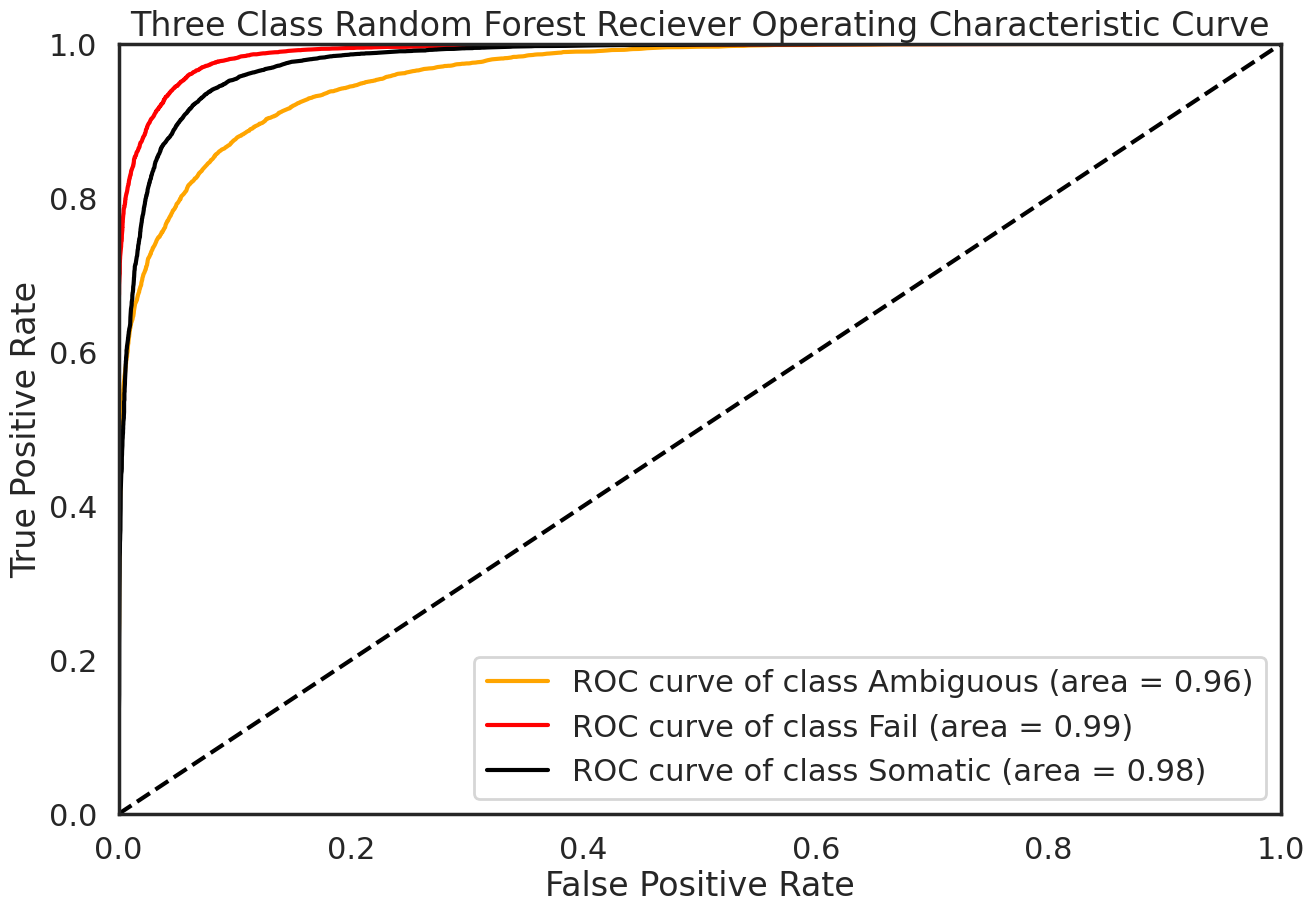

In [24]:
# Plot ROC for Random Forest Model
class_lookup = {0: 'Ambiguous', 1: 'Fail', 2: 'Somatic'}
fig, ax = plt.subplots()
create_roc_curve(Y_one_hot, probabilities, class_lookup, 'Three Class Random'
                 ' Forest Reciever Operating Characteristic Curve', ax)

confidence intervals +-:  [0.00058951 0.00327516 0.00592253 0.00822346 0.00936724 0.00994356
 0.00920558 0.00655483 0.00422043 0.00069726]


/home/anepal/analysis_utils/ClassifierPlots.py:96: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  ax2.plot([0, 1], [0, 1], 'k--', color='grey', linewidth=1)


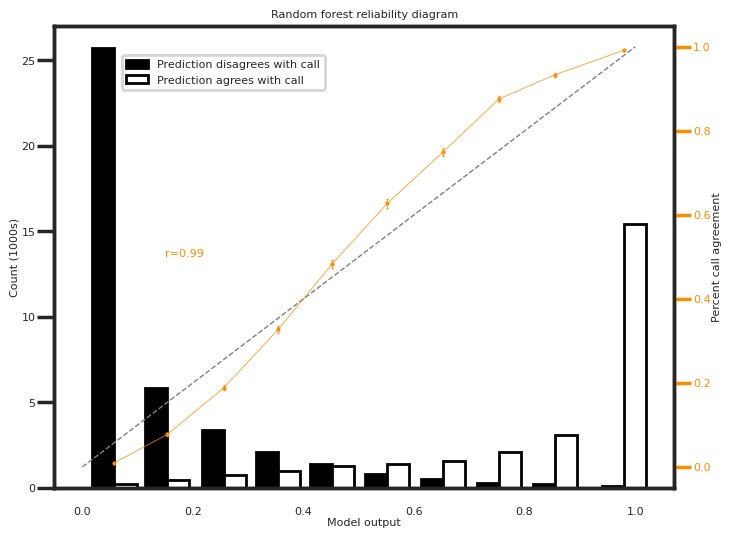

In [25]:
# Plot reliability diagram for Random Forest Model
fig, ax = plt.subplots(figsize=(8,6),dpi=100)
lgd = create_reliability_diagram(probabilities, Y_one_hot,['Ambiguous','Fail','Somatic'], 'darkorange', 'Random forest reliability diagram',
                                 ax, True, True, True)
lgd.set_bbox_to_anchor((0.1, .85))

## Feature importance analysis

In [26]:
# Rebuild random forest model
forest = estimator.fit(X_train, Y_train)

In [27]:
# Sum the feature importance metrics for one-hot encoded variables
# (Feature importance calculation in scikit-learn is outlined 
# here https://stackoverflow.com/a/15821880/3862525).
# Since the importances are calculated with the same denominator, summing is
# appropriate
def sum_features(feature_import, label):
    starts_with_label = feature_import.feature.str.startswith(label)
    return feature_import.importance[starts_with_label].sum()

In [28]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
# Create function to determine the feature importance 
def create_feature_importance_plot(trained_model, save_fp='/home/anepal/data/random_forest/feature_import.pkl'):
    feature_import = pd.DataFrame([training_data.drop(['call'], axis=1).columns.values,trained_model.feature_importances_]).T
    feature_import.columns = ['feature', 'importance']
    summed_importances = []
    for label in ['disease', 'reviewer']:
        summed_importances.append([label, sum_features(feature_import, label)])
    summed_importances = pd.DataFrame(summed_importances, columns=['feature','importance'])
    feature_import.to_pickle(save_fp)
    feature_import.sort_values('importance', ascending=False, inplace=True)
    feature_import.replace({'feature':{'var':'variant','ref':'reference', 'avg':'average', '_se_':'_single_end_', '3p':'3_prime', '_':' '}}, regex=True, inplace=True)
    sns.barplot(y='feature', x='importance', data=feature_import.head(30), color='darkorange')
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')
    plt.title('Random forest feature importance')

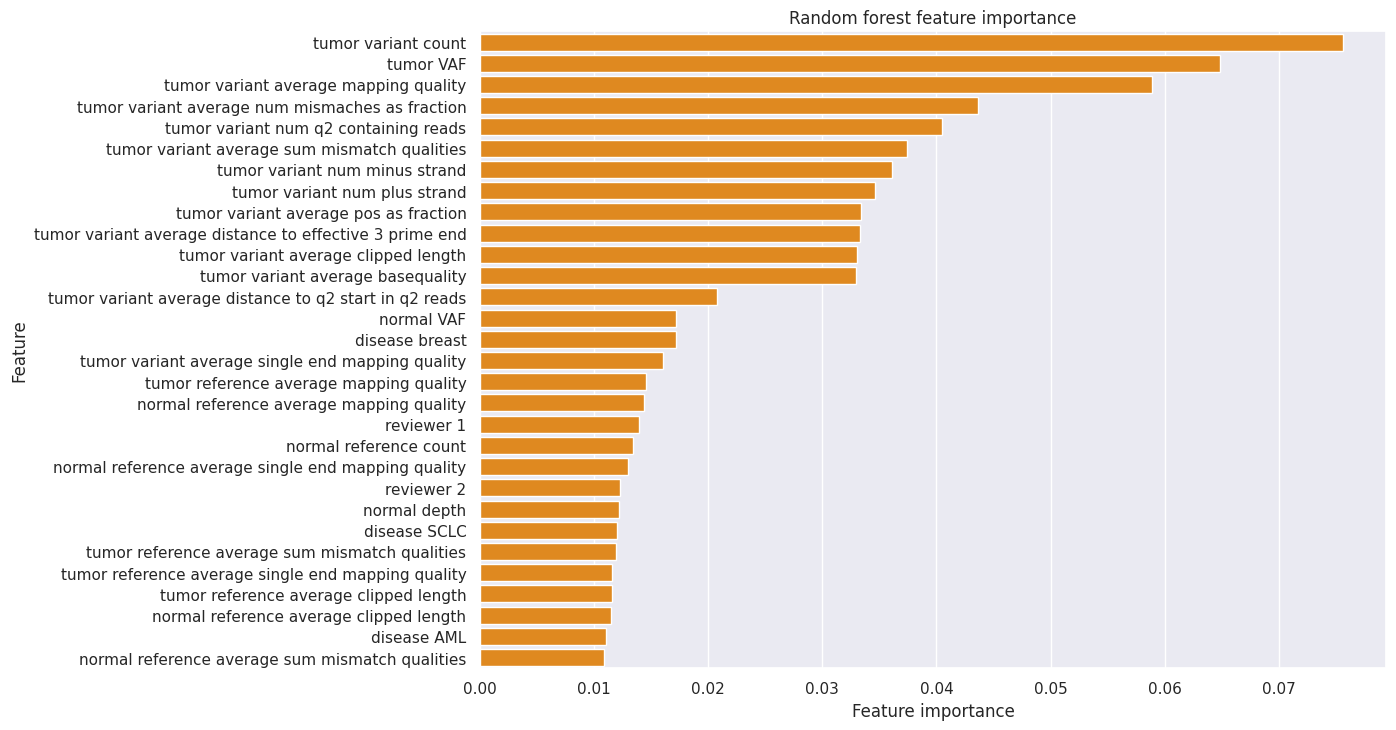

In [29]:
# Plot feature importance graph
create_feature_importance_plot(forest)

### Test set performance

In [30]:
# Determine performance on test set
test_prob = forest.predict_proba(X_test)

In [31]:
# Transform labels for predictions
Y_test_labels = enc.fit_transform(Y_test)

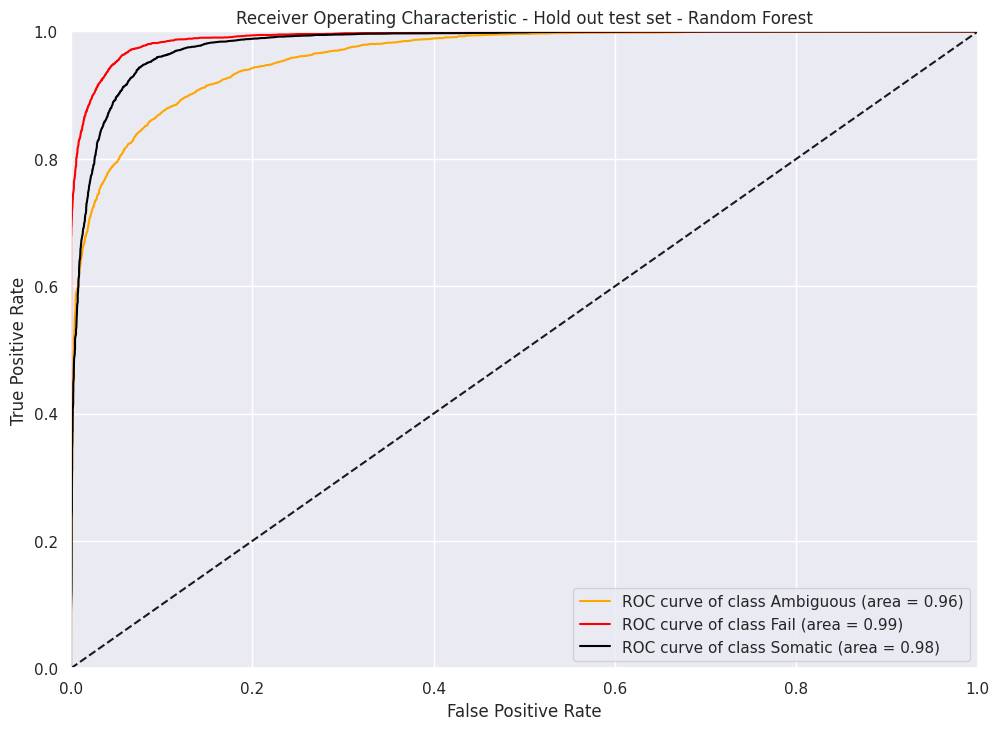

In [32]:
# Plot AUC for test set
fig, ax = plt.subplots()
create_roc_curve(Y_test_labels, test_prob, class_lookup, 'Receiver Operating '
                 'Characteristic - Hold out test set - '
                 'Random Forest', ax)

confidence intervals +-:  [0.00086691 0.00440912 0.00840385 0.01165676 0.0136187  0.01422218
 0.01273116 0.00919191 0.00559853 0.00109777]


/home/anepal/analysis_utils/ClassifierPlots.py:96: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  ax2.plot([0, 1], [0, 1], 'k--', color='grey', linewidth=1)


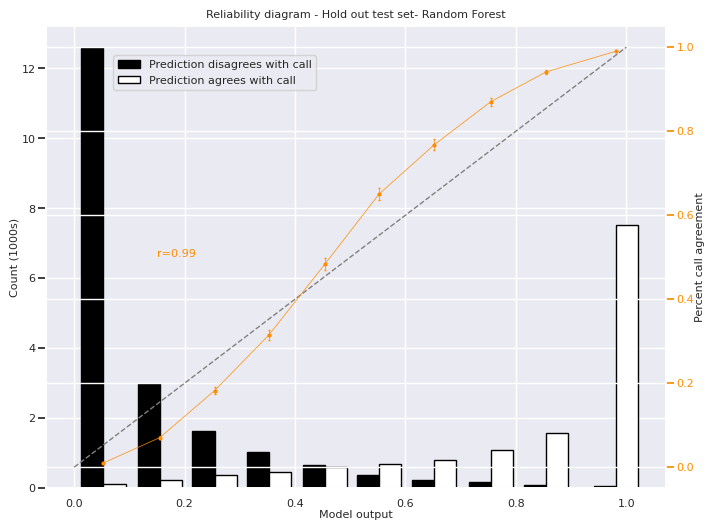

In [33]:
# Plot reliability diagram for test set
fig, ax = plt.subplots(figsize=(8,6),dpi=100)
lgd = create_reliability_diagram(test_prob, Y_test_labels,
                                 ['Ambiguous','Fail','Somatic'], 
                                 'darkorange', 'Reliability diagram - Hold out test set'
                                 '- Random Forest',
                                 ax, True, True, True)
lgd.set_bbox_to_anchor((0.1, .85))